In [1]:
#Importing the relevant libraries & previously shaped datasets
import pandas as pd
import numpy as np
import sys
import re
import seaborn as sns
import matplotlib as plt
import plotly.express as px
import nbformat as nb
atdf_2 = pd.read_csv("data/attacks_1_4_3_gdp3.csv")
atdf_1 = pd.read_csv("data/attacks_1_4_1.csv")
vdf_2 = pd.read_csv("data/GDP_df_2.csv")
vdf_1 = pd.read_csv("data/MR_df_1.csv")

In [76]:
#Seaborn config
sns.set_context("notebook")
#sns contexts: ({paper, notebook, talk, poster})
sns.set_style("ticks")
#sns styles: ({darkgrid, whitegrid, dark, white, ticks})
sns.set(rc={"figure.figsize": (12.,6.)})

## Hypothesis A: Fatality rate across time

In [22]:
vdf_1.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,73.0,1982.000000,21.217131,1946.0,1964.00000,1982.000000,2000.00000,2018.000000
Ratio,73.0,0.183991,0.101396,0.0,0.09375,0.173913,0.25641,0.428571


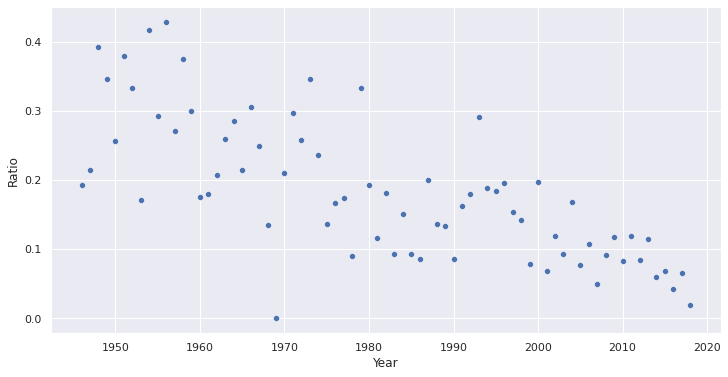

In [77]:
#Scatter
sns.scatterplot(x= "Year", y="Ratio" , data=vdf_1);

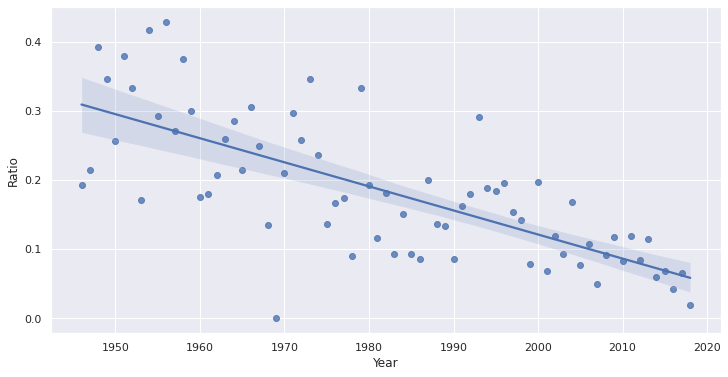

In [78]:
#Regression plot
sns.regplot(x= "Year", y="Ratio" , data=vdf_1);

In [14]:
#removing Micronesia & Spain from the data
vdf_22 = vdf_2[vdf_2.Country != 'SPAIN']
vdf_22 = vdf_22[vdf_2.Country != 'MICRONESIA']
#Why??

<ipython-input-14-4ae661085886>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vdf_22 = vdf_22[vdf_2.Country != 'MICRONESIA']


## Hypothesis B: Fatality rate and Per capita income

In [23]:
#Descriptive statistics
vdf_22.describe().T

,count,mean,std,min,25%,50%,75%,max
Ratio,19.0,0.263831,0.144101,0.039058,0.122482,0.310345,0.379665,0.461538
GDP_percap,19.0,17791.208371,15989.956790,625.696612,3147.026756,7334.370688,32008.788975,45608.154483
Case_num,19.0,182.473684,378.355413,22.000000,28.500000,48.000000,90.500000,1613.000000


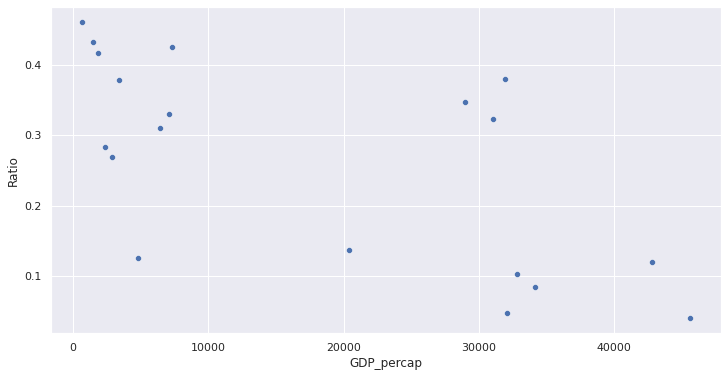

In [79]:
#"Vanilla" Scatter
Scatter_A = sns.scatterplot(x= "GDP_percap", y="Ratio" , data=vdf_22)

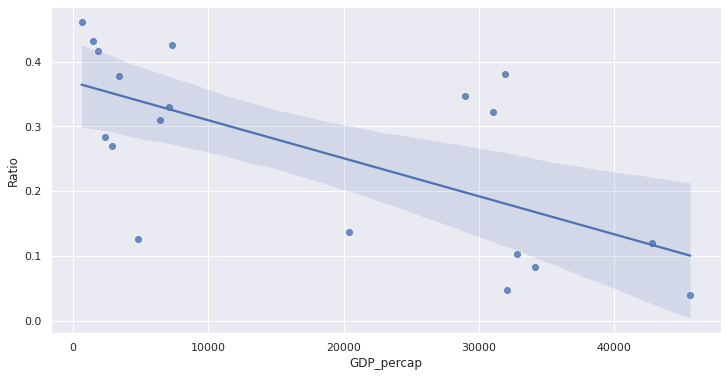

In [80]:
#"Vanilla" Regression plot
Reg_A = sns.regplot(x= "GDP_percap", y="Ratio" , data=vdf_22);

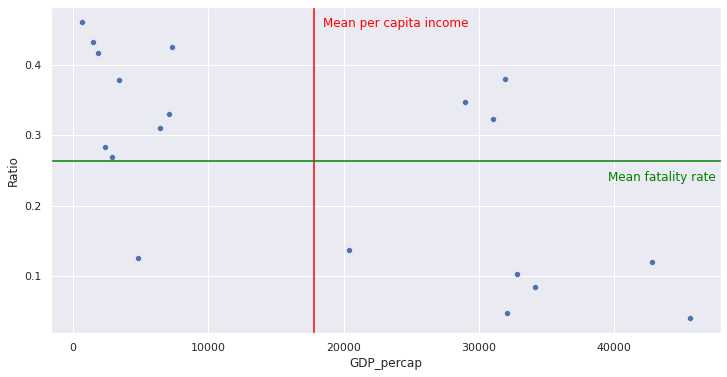

In [81]:
#"Squeezed" Scatter plot

Scatter_A2 = sns.scatterplot(x= "GDP_percap", y="Ratio" , data=vdf_22);
Scatter_A2.axvline(x=vdf_22.GDP_percap.mean(), c="red", label="Mean income");
Scatter_A2.axhline(y=vdf_22.Ratio.mean(), c="green", label="Mean fatality rate");
Scatter_A2.annotate('Mean per capita income', (18500, 0.455),horizontalalignment='left', size='medium', color='red')
Scatter_A2.annotate('Mean fatality rate', (39500, 0.235),horizontalalignment='left', size='medium', color='green')

a_2 = ['USA', 'AUS', 'MEX', 'BRA', 'GBR', 'RSA', 'MH_INC', 'BHS', 
       'FRA', 'NZL', 'ML_INC', 'JPN', 'EGY', 'HI_INC', 'PHL', 'FJI', 'LO_INC', 
       'PNG', 'ITA']
b = list(vdf_22["Ratio"])
c = list(vdf_22["GDP_percap"])

for i, txt in enumerate(a_2):
    Scatter_A.annotate(txt, (c[i], b[i]))

In [82]:
#Interactive scatter (with plotly)
fig = px.scatter(vdf_22, x="GDP_percap", y="Ratio",
                 hover_data=['Country'])
fig.show()